In [1]:
import sklearn
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 1.导入数据

In [2]:
train=pd.read_csv('..\Dataset\cs-training.csv')
test=pd.read_csv('..\Dataset\cs-test.csv')

In [3]:
train.shape

(150000, 12)

In [4]:
test.shape

(101503, 12)

In [5]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
columns={'Unnamed: 0':'序号','SeriousDlqin2yrs':'客户是否好坏','RevolvingUtilizationOfUnsecuredLines':'可用额度比值','age':'年龄',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值','age':'年龄','NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天的次数',
        'DebtRatio':'负债率','MonthlyIncome':'月收入','NumberOfOpenCreditLinesAndLoans':'信贷数量','NumberOfTimes90DaysLate':'逾期90天次数',
         'NumberRealEstateLoansOrLines':'不动产数量','NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天次数','NumberOfDependents':'被抚养人数量'}
train.rename(columns=columns,inplace=True)

In [7]:
test.rename(columns=columns,inplace=True)

In [8]:
train.head()

,序号,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
train.set_index('序号',inplace=True)
test.set_index('序号',inplace=True)

In [10]:
train.head()

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:
test.head()

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
print(train.isnull().sum())
print('--------------------------------')
print(test.isnull().sum())

客户是否好坏             0
可用额度比值             0
年龄                 0
逾期30-59天的次数        0
负债率                0
月收入            29731
信贷数量               0
逾期90天次数            0
不动产数量              0
逾期60-89天次数         0
被抚养人数量          3924
dtype: int64
--------------------------------
客户是否好坏         101503
可用额度比值              0
年龄                  0
逾期30-59天的次数         0
负债率                 0
月收入             20103
信贷数量                0
逾期90天次数             0
不动产数量               0
逾期60-89天次数          0
被抚养人数量           2626
dtype: int64


# 2.数据探索
#### 这部分主要的内容就是对数据集中的各个特征量进行一个探索

In [13]:
# pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

在所有客户中为好客户的数量为: 139974 ,其中比例为: 0.93316
在所有客户中为坏客户的数量为: 10026 ,其中比例为: 0.06684


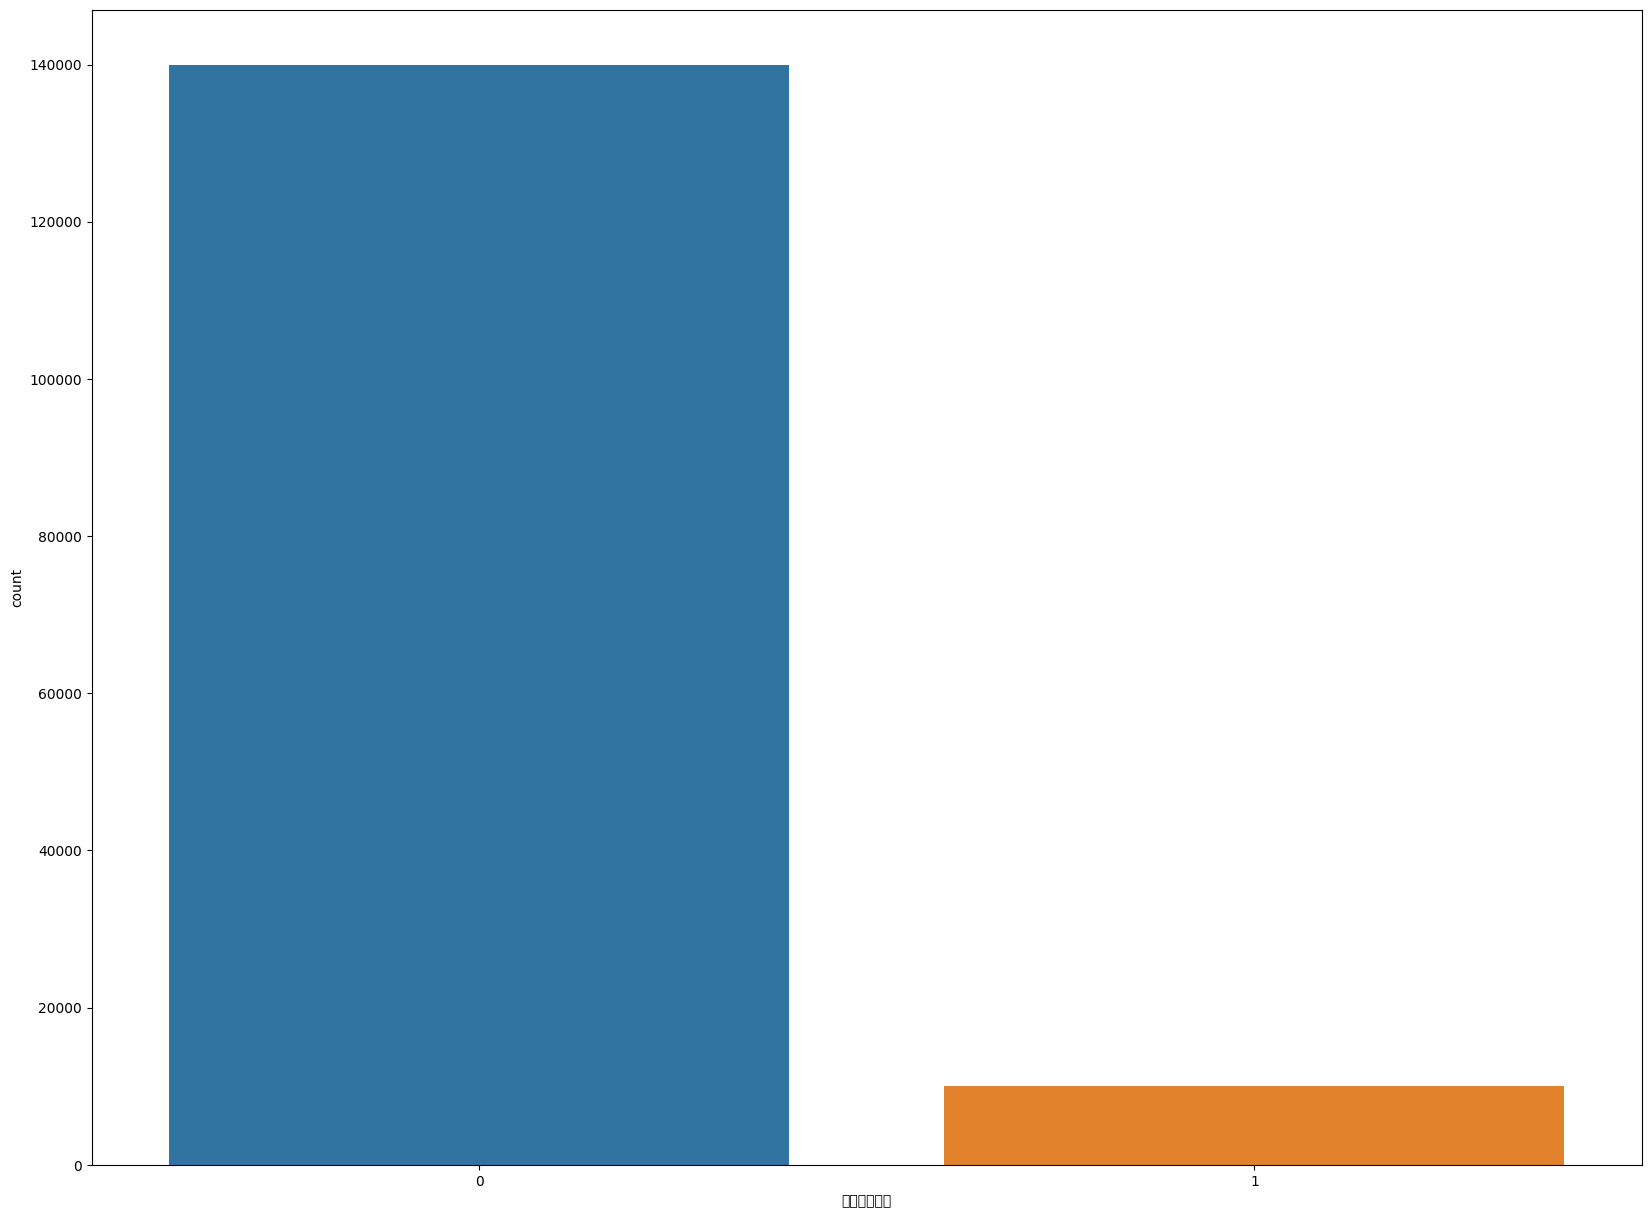

In [14]:
f,ax=plt.subplots(figsize=(20,15))
sns.countplot(x='客户是否好坏',data=train)
total=train['客户是否好坏'].count()
counts=train.groupby('客户是否好坏').size()
print('在所有客户中为好客户的数量为:',counts[0],',其中比例为:',counts[0]/total)
print('在所有客户中为坏客户的数量为:',counts[1],',其中比例为:',counts[1]/total)

In [15]:
train.describe()

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<AxesSubplot:ylabel='可用额度比值'>

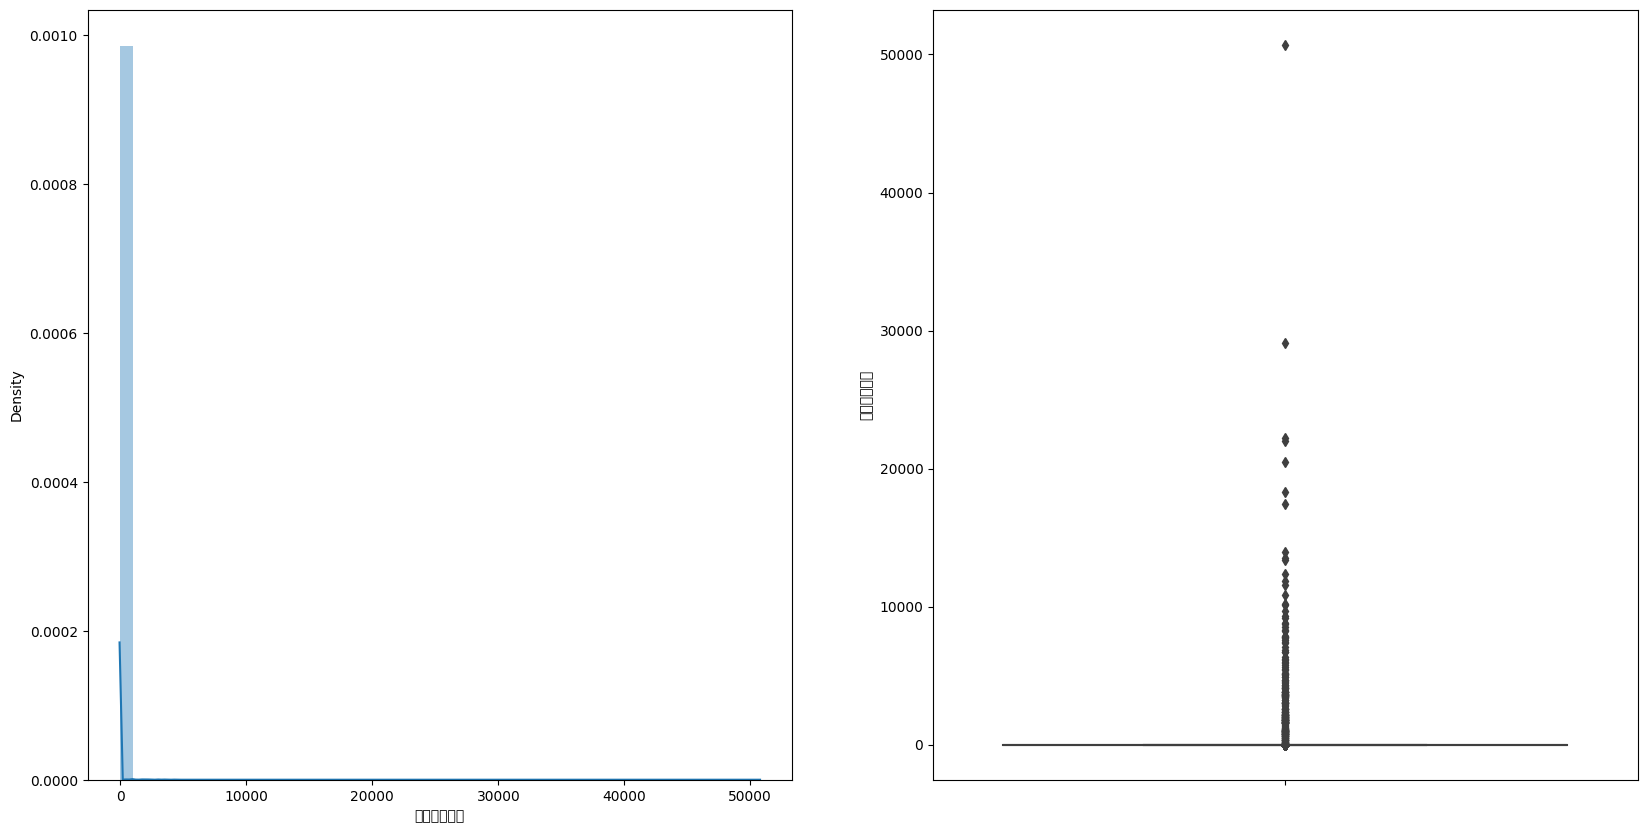

In [16]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['可用额度比值'],ax=ax1)
sns.boxplot(y='可用额度比值',data=train,ax=ax2)

<AxesSubplot:ylabel='年龄'>

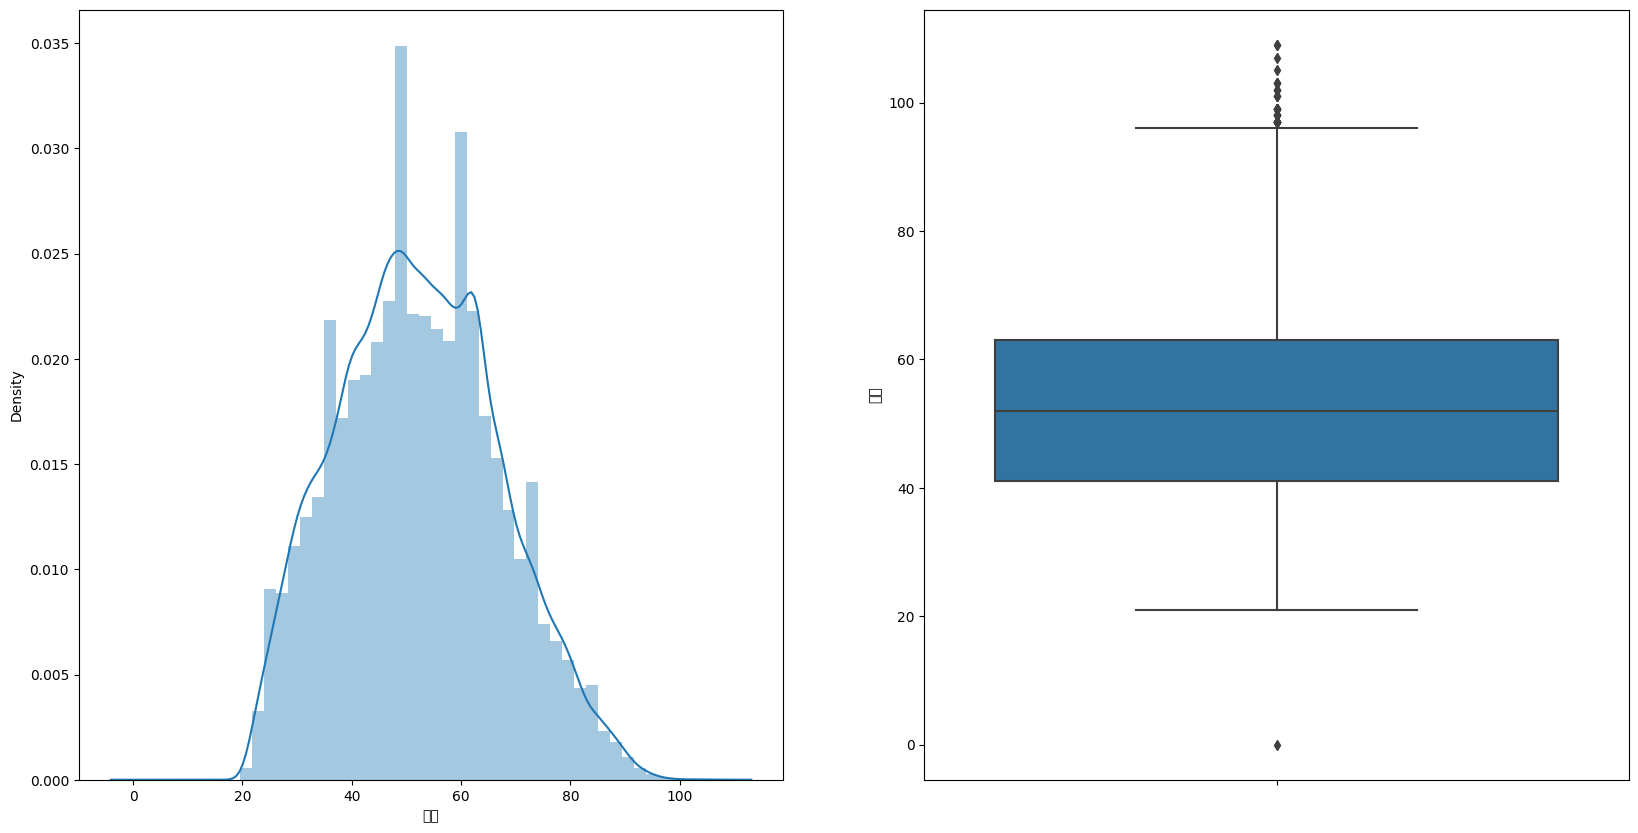

In [17]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['年龄'],ax=ax1)
sns.boxplot(y='年龄',data=train,ax=ax2)

In [18]:
train[train['年龄']<18]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


发现有一个年龄为0的用户，因此把这条数据视为异常值

<AxesSubplot:ylabel='逾期90天次数'>

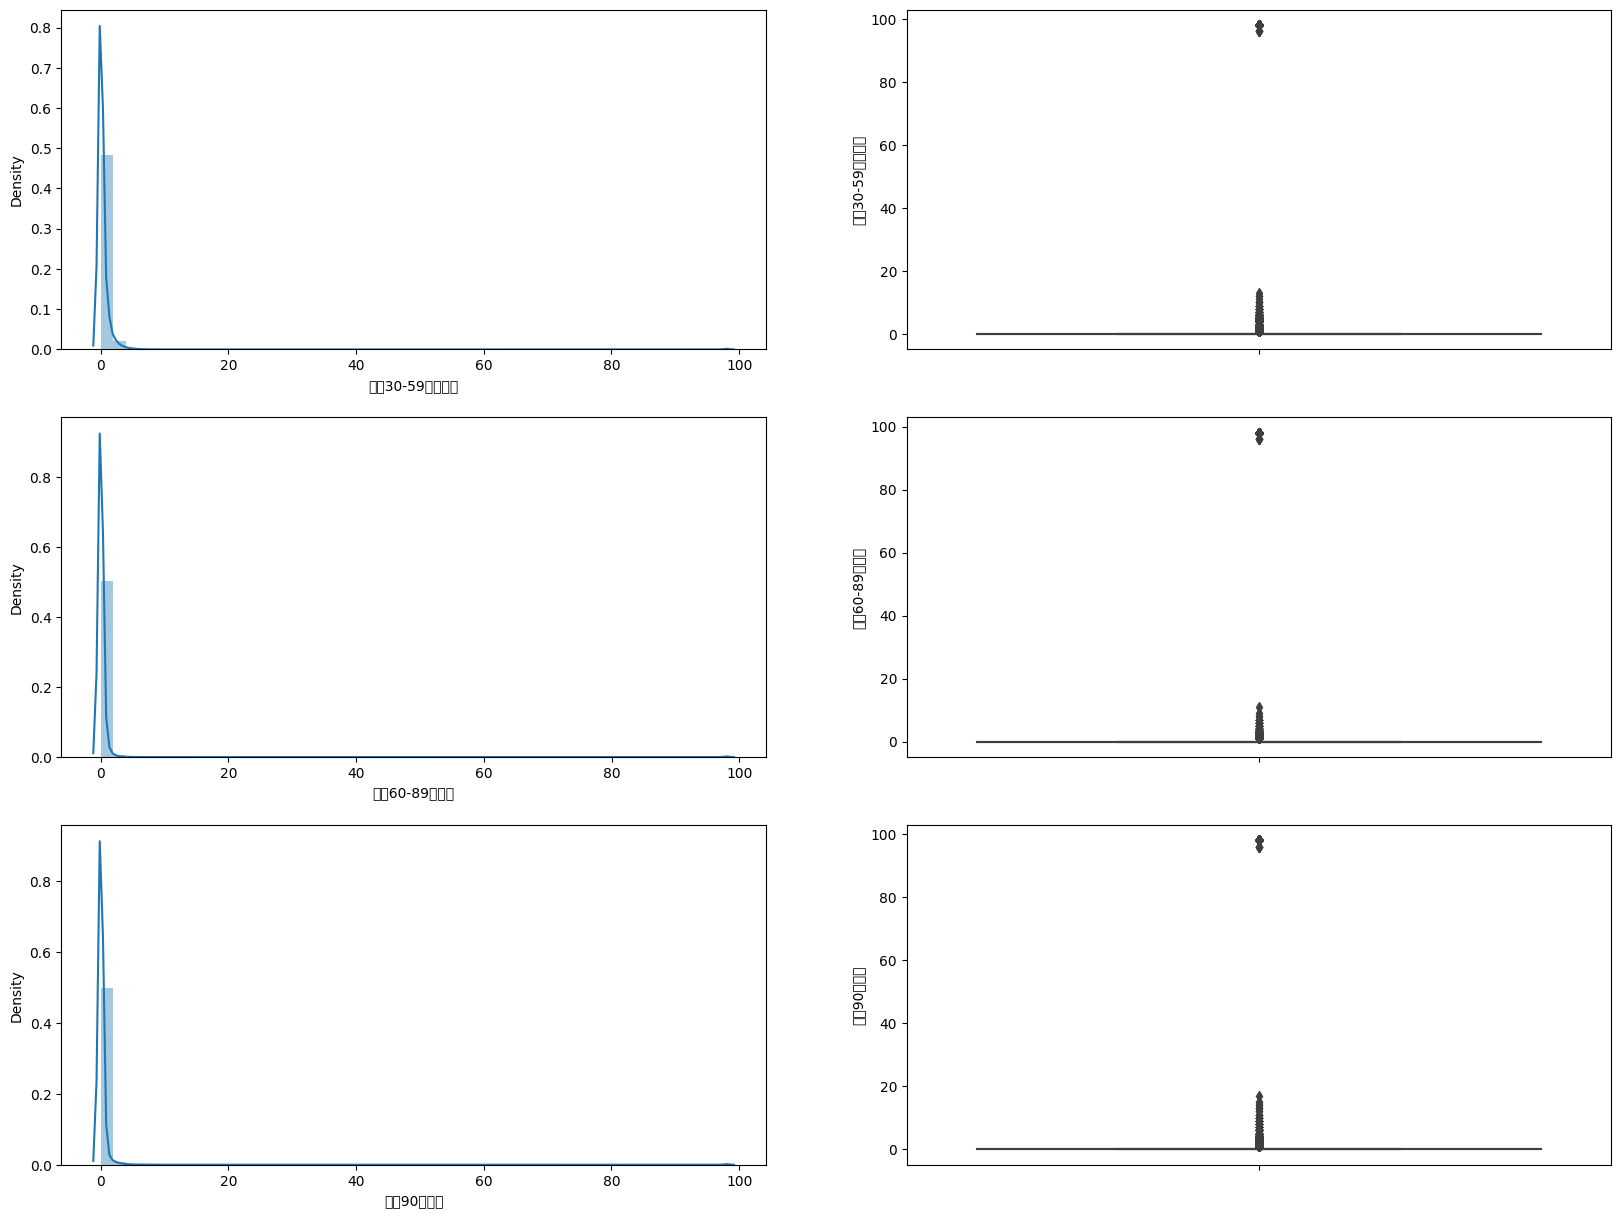

In [19]:
f,[[ax1,ax2],[ax3,ax4],[ax5,ax6]]=plt.subplots(3,2,figsize=(20,15))
sns.distplot(train['逾期30-59天的次数'],ax=ax1)
sns.boxplot(y='逾期30-59天的次数',data=train,ax=ax2)

sns.distplot(train['逾期60-89天次数'],ax=ax3)
sns.boxplot(y='逾期60-89天次数',data=train,ax=ax4)

sns.distplot(train['逾期90天次数'],ax=ax5)
sns.boxplot(y='逾期90天次数',data=train,ax=ax6)

In [20]:
train.loc[:,['逾期30-59天的次数','逾期60-89天次数','逾期90天次数']].describe()

,逾期30-59天的次数,逾期60-89天次数,逾期90天次数
count,150000.000000,150000.000000,150000.000000
mean,0.421033,0.240387,0.265973
std,4.192781,4.155179,4.169304
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [21]:
train[train['逾期30-59天的次数']>60]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [22]:
train[train['逾期60-89天次数']>60]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [23]:
train[train['逾期90天次数']>60]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0


In [24]:
counts1=train.groupby('逾期30-59天的次数').size()
counts2=train.groupby('逾期60-89天次数').size()
counts3=train.groupby('逾期90天次数').size()
print(counts1)
print(counts2)
print(counts3)

逾期30-59天的次数
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
dtype: int64
逾期60-89天次数
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
dtype: int64
逾期90天次数
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
dtype: int64


可以看出这三个不同区间的数据里面逾期次数大于60天的都是这一模一样的269条数据，因此我们有理由认为这269条数据都是异常数据。

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: 负债率, dtype: float64

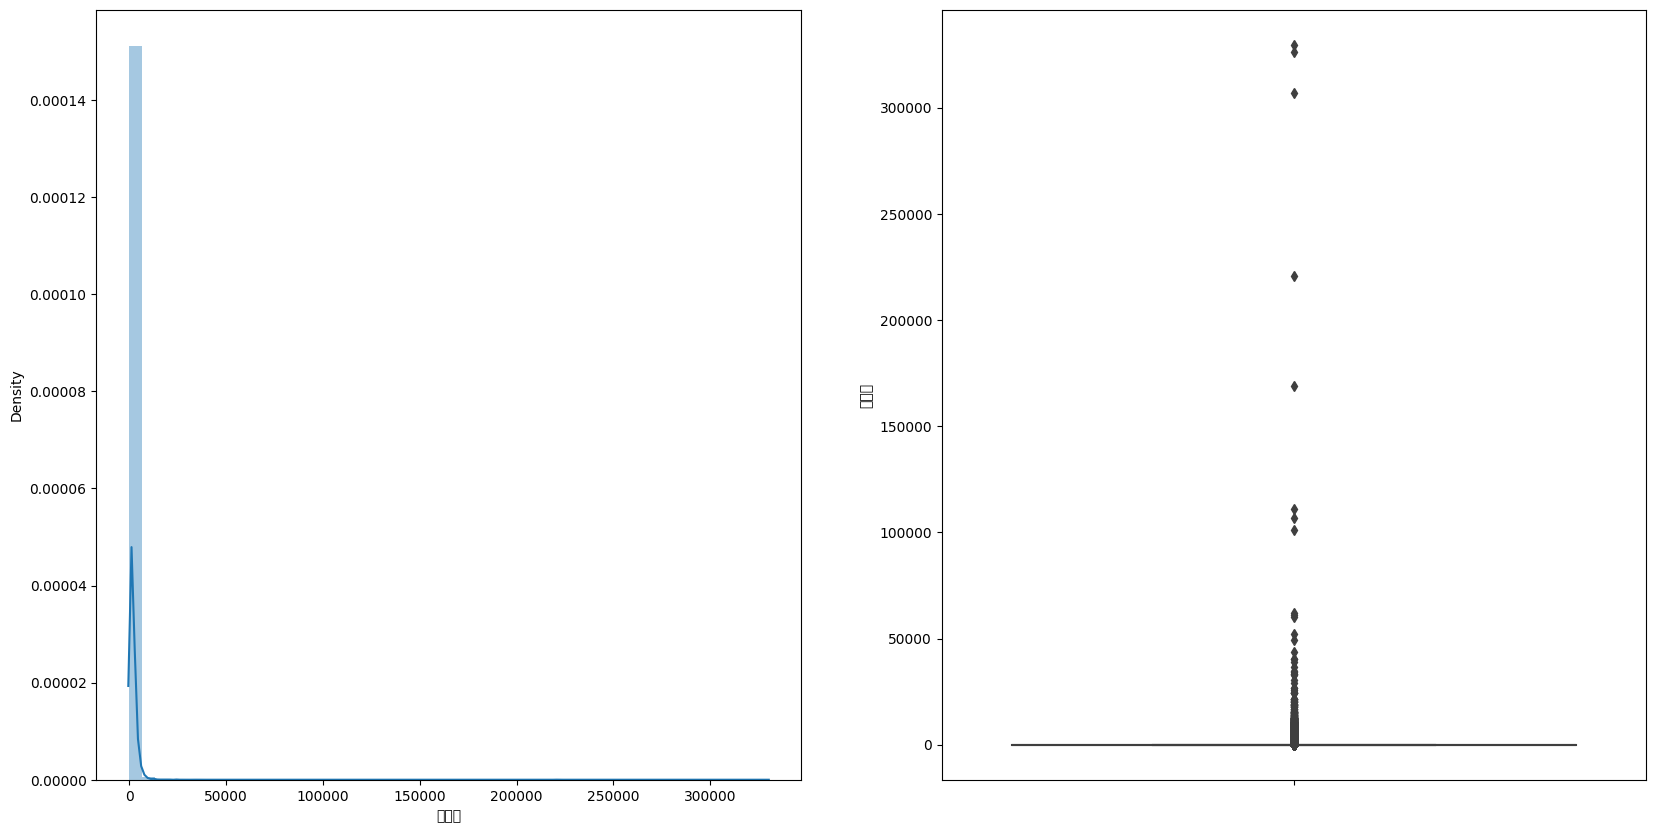

In [25]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['负债率'],ax=ax1)
sns.boxplot(y='负债率',data=train,ax=ax2)
train['负债率'].describe()

In [26]:
train[train['负债率']>80000]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
4855,0,0.000000,56,0,168835.0,NaN,10,0,3,0,2.0
7514,0,0.152293,71,0,110952.0,NaN,9,0,0,0,0.0
36601,0,0.001782,65,0,326442.0,NaN,6,0,1,0,0.0
58901,0,0.182640,37,0,220516.0,NaN,8,0,3,0,NaN
60153,0,0.000000,65,0,329664.0,NaN,9,0,3,0,0.0
69846,0,0.386451,66,0,101320.0,NaN,12,0,0,0,0.0
103042,0,0.364845,65,0,106885.0,NaN,8,0,4,0,NaN
127048,0,0.034290,58,1,307001.0,NaN,16,0,4,0,2.0


count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: 月收入, dtype: float64
数据的缺失率为： 0.19820666666666667


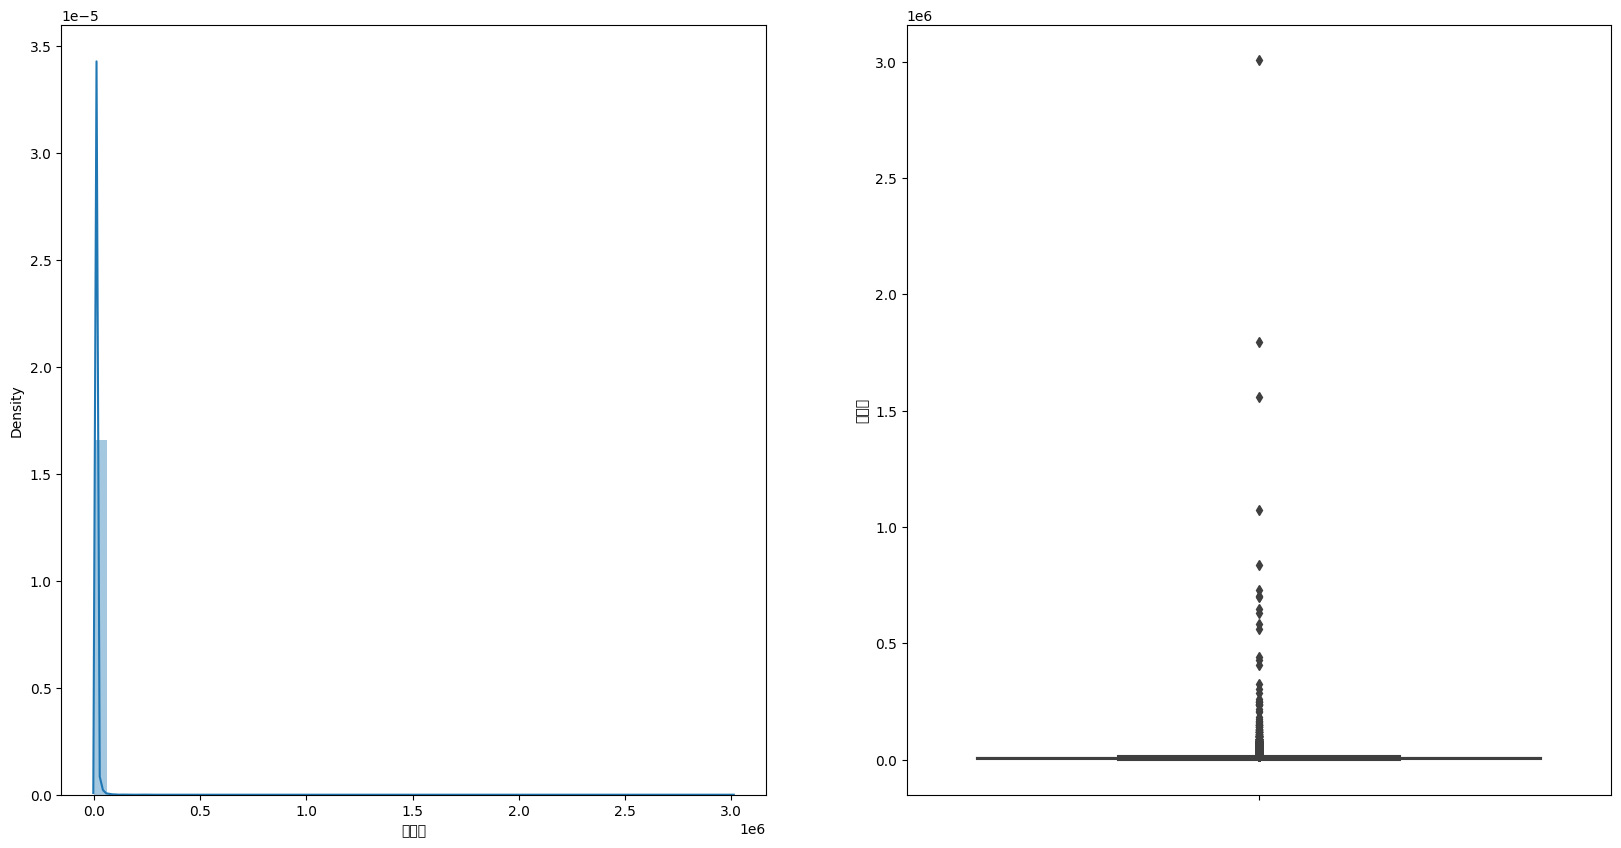

In [27]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['月收入'],ax=ax1)
sns.boxplot(y='月收入',data=train,ax=ax2)
print(train['月收入'].describe())
print('数据的缺失率为：',(train['月收入'].isnull().sum())/train.shape[0])

接近五分之一的数据缺少月收入的记录，因此要采用建模的方式进行补充。

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: 信贷数量, dtype: float64


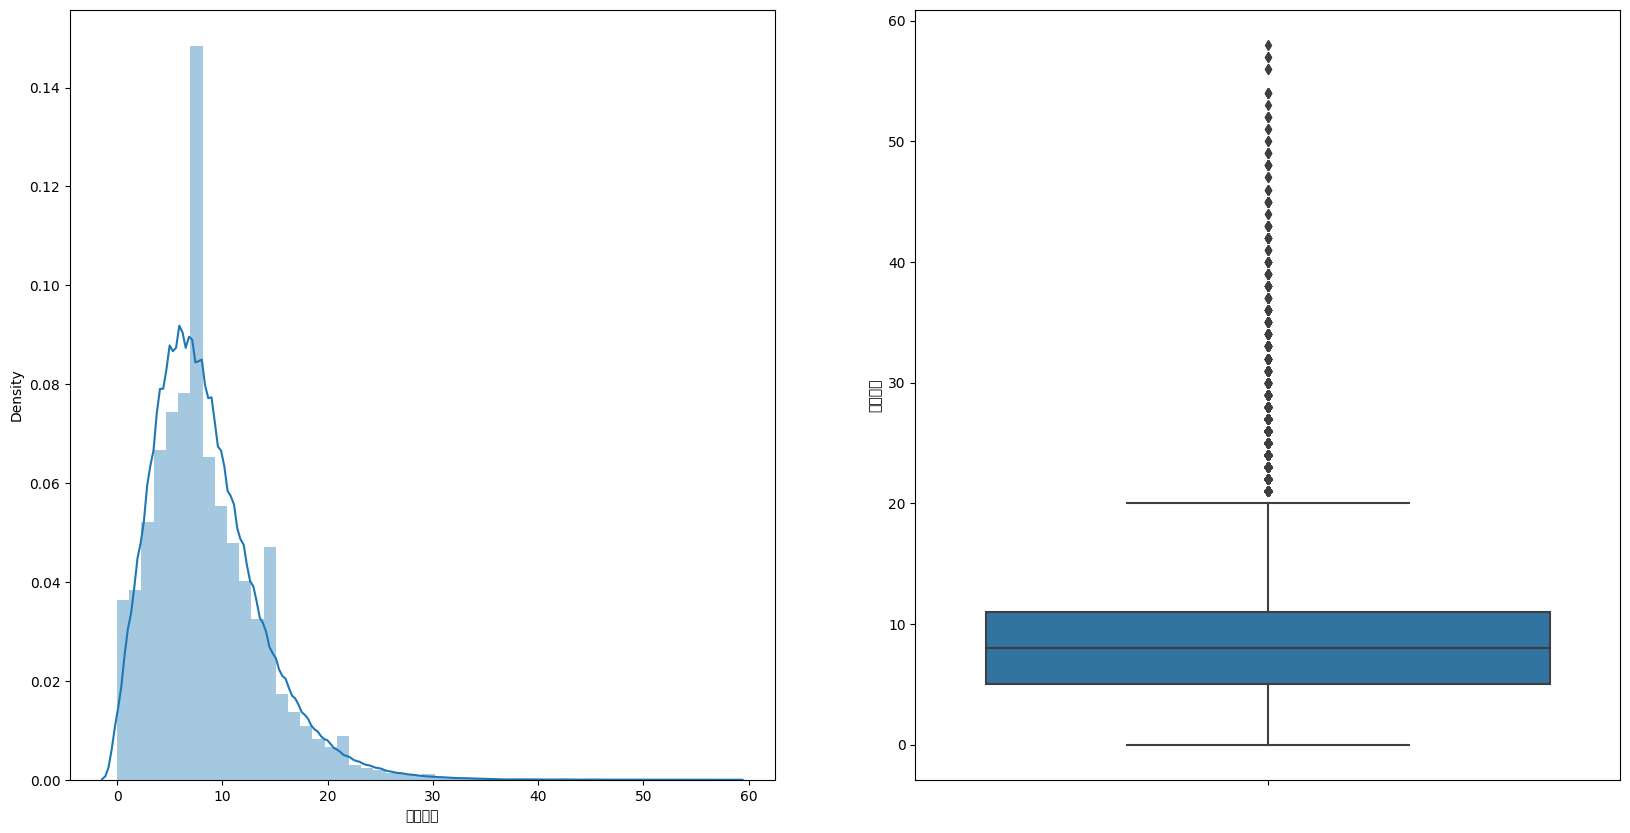

In [28]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['信贷数量'],ax=ax1)
sns.boxplot(y='信贷数量',data=train,ax=ax2)
print(train['信贷数量'].describe())

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: 不动产数量, dtype: float64


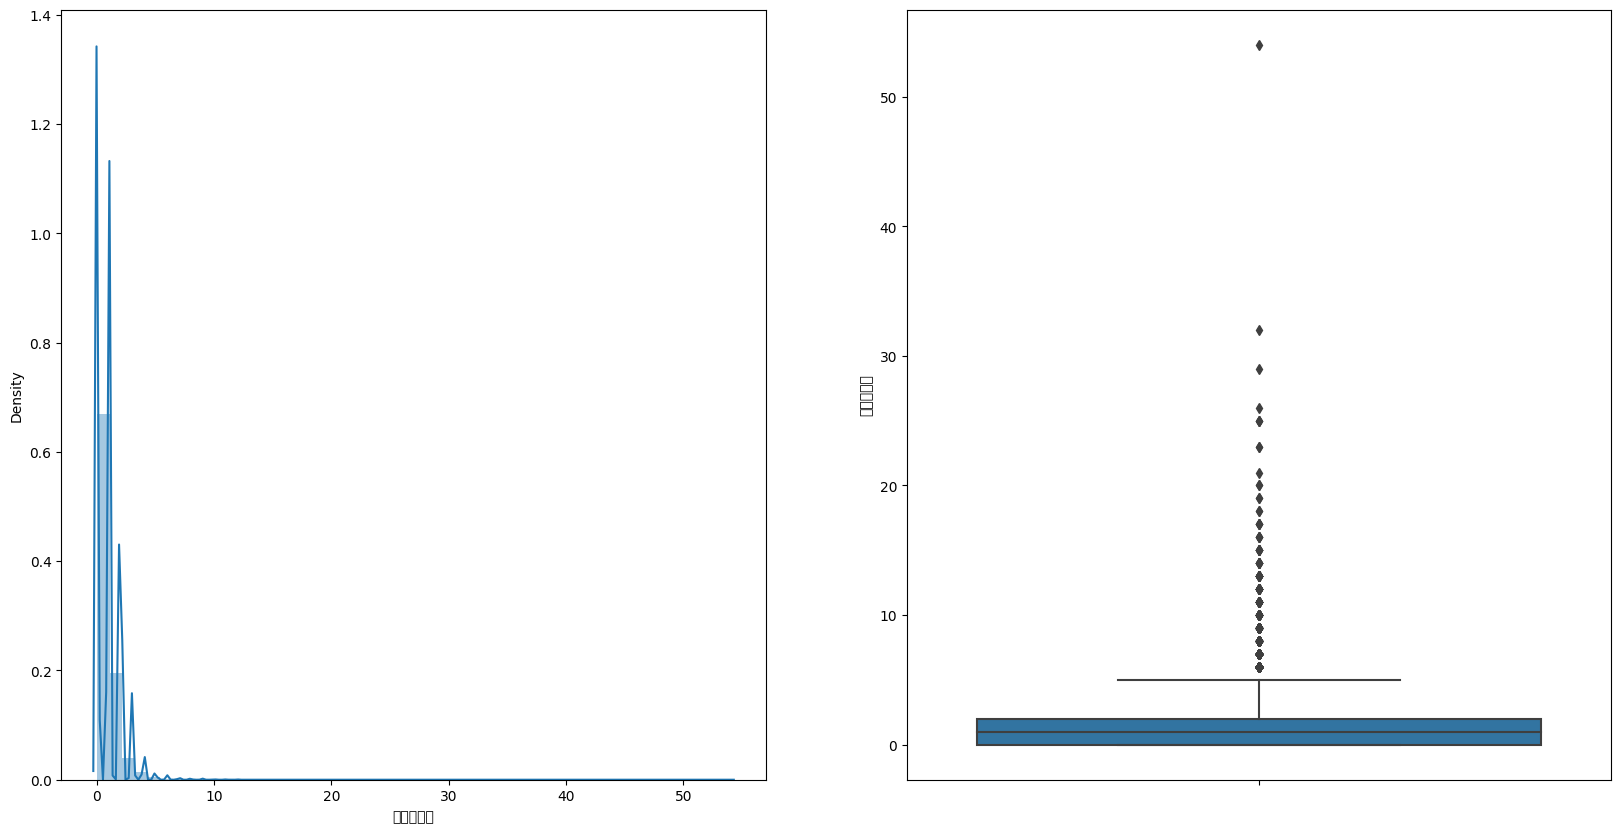

In [29]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['不动产数量'],ax=ax1)
sns.boxplot(y='不动产数量',data=train,ax=ax2)
print(train['不动产数量'].describe())

In [30]:
train[train['不动产数量']>40]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
30588,0,0.003032,53,0,5.967504,8000.0,58,0,54,0,0.0


这条数据没有什么异常之处，因此不需要处理。

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: 被抚养人数量, dtype: float64


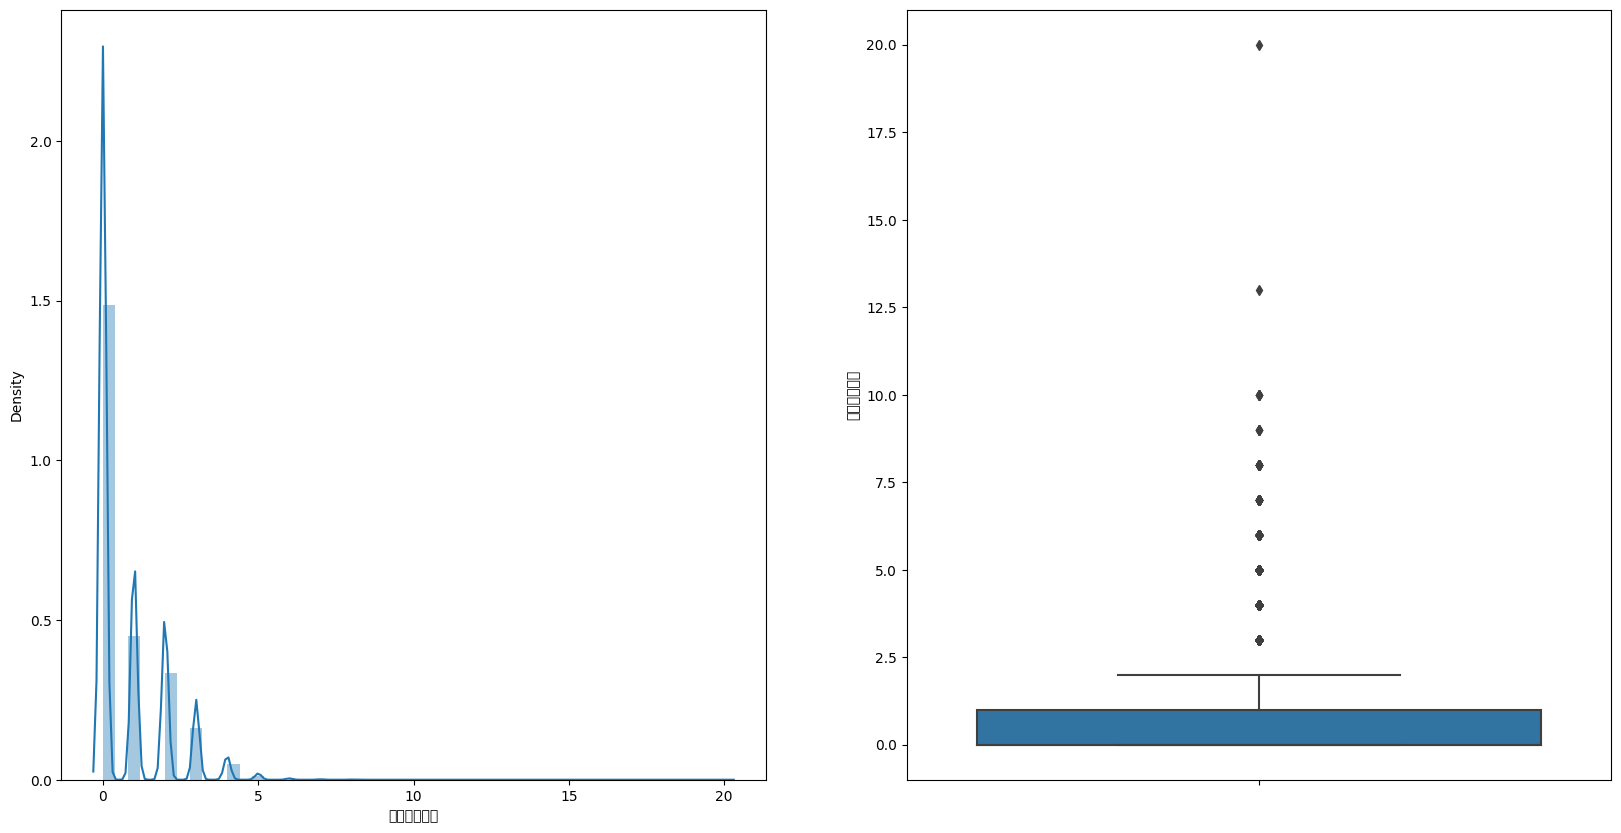

In [31]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))
sns.distplot(train['被抚养人数量'],ax=ax1)
sns.boxplot(y='被抚养人数量',data=train,ax=ax2)
print(train['被抚养人数量'].describe())

In [32]:
print(train['被抚养人数量'].value_counts())
print(test['被抚养人数量'].value_counts())

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: 被抚养人数量, dtype: int64
0.0     58618
1.0     17618
2.0     13298
3.0      6623
4.0      1995
5.0       526
6.0       125
7.0        50
8.0        16
10.0        3
9.0         3
20.0        1
43.0        1
Name: 被抚养人数量, dtype: int64


In [33]:
print('训练集中众数占总数的比例为：',train['被抚养人数量'].value_counts()[0]/len(train['被抚养人数量']))
print('测试集中众数占总数的比例为：',test['被抚养人数量'].value_counts()[0]/len(test['被抚养人数量']))

训练集中众数占总数的比例为： 0.5793466666666667
测试集中众数占总数的比例为： 0.5775001724086973


In [34]:
train[train['被抚养人数量']>10]

,客户是否好坏,可用额度比值,年龄,逾期30-59天的次数,负债率,月收入,信贷数量,逾期90天次数,不动产数量,逾期60-89天次数,被抚养人数量
序号,,,,,,,,,,,
6300,0,0.226616,40,1,0.576539,6316.0,11,2,1,0,20.0
128035,0,1.000000,53,1,0.230054,3333.0,3,1,1,0,13.0


# 3.数据预处理

#### 接下来就要进行数据清洗和缺失值的处理

In [35]:
# import sklearn
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
train=train[train['可用额度比值']<1]
train=train[train['年龄']>18]
train=train[train['逾期30-59天的次数']<60]
train.shape

(146392, 11)

In [36]:
test=test[test['可用额度比值']<1]
test=test[test['年龄']>18]
test=test[test['逾期30-59天的次数']<60]
test.shape

(99096, 11)

In [37]:
# 用GBDT来拟合

# def fillmonthincome(df):
#     param_grid = {
#     'n_estimators': [20,50,100,200],  # 决策树数量
#     'max_depth': [ 4, 5,6,7],  # 决策树最大深度
#     'learning_rate': [0.01,0.02,0.05, 0.1, 0.2],  # 学习率
# }
#     known=df[df['月收入'].notnull()]
#     unknown=df[df['月收入'].isnull()]
#     known_x=known.drop(columns='月收入',axis=1) 
#     known_y=known['月收入']
#     GBDT = GradientBoostingRegressor()
#     grid_search = GridSearchCV(GBDT, param_grid=param_grid, cv=10,refit=True)
#     grid_search.fit(known_x, known_y)
#     print("Best parameters:", grid_search.best_params_)
#     print("Best score:", grid_search.best_score_)


# output:
#     Best parameters: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 50}
#     Best score: 0.14478979883920315




In [38]:
# fillmonthincome(train)
# 网格搜索需要训练1-2个小时，谨慎使用

In [39]:
# # 用随机森林来拟合
# from sklearn.ensemble import RandomForestRegressor
# def fillmonthincome(df):
# #     param_grid = {
# #     'n_estimators': [50,100,200],  # 决策树数量
# #     'max_depth': [5,6],  # 决策树最大深度
# #     # 'learning_rate': [0.01,0.02,0.05],  # 学习率
# # }
#     known=df[df['月收入'].notnull()]
#     unknown=df[df['月收入'].isnull()]
#     x_train=known.iloc[:,[1,2,3,4,6,7,8,9]]
#     y_train=known.iloc[:,5]
#     x_test=unknown.iloc[:,[1,2,3,4,6,7,8,9]]
# #     known_x=known.drop(columns='月收入',axis=1)
# #     known_y=known['月收入']
# #     # GBDT = GradientBoostingRegressor()
#     RF=RandomForestRegressor(n_estimators=200,random_state=0,max_depth=5)
#     pred=RF.fit(x_train,y_train).predict(x_test)
#     df.loc[df['月收入'].isnull(),'月收入']=pred
# #     grid_search = GridSearchCV(RF, param_grid=param_grid, cv=7,refit=True, verbose=2)
# #     grid_search.fit(known_x, known_y)
# #     print("Best parameters:", grid_search.best_params_)
# #     print("Best score:", grid_search.best_score_)

# # output:
# #     Best parameters: {'max_depth': 5, 'n_estimators': 200}
# #     Best score: -0.06441664679140145

##### 通过以上两种算法可以看出拟合效果都不好，甚至在用随机森林来拟合的时候得分出现了负分的情况，因此接下来我将采用平均值来替代缺失的月收入,说明训练拟合出来的值的效果还不如用平均值的效果。

In [40]:
def fillmonthincome(df):
    known=df[df['月收入'].notnull()]
    df['月收入'].fillna(known['月收入'].mean(),inplace=True)
    print('已填充平均值：',known['月收入'].mean())

In [41]:
fillmonthincome(train)

已填充平均值： 6708.410484778236


In [42]:
fillmonthincome(test)

已填充平均值： 6900.48767778477


In [43]:
print(train.isnull().sum())
print(test.isnull().sum())

客户是否好坏            0
可用额度比值            0
年龄                0
逾期30-59天的次数       0
负债率               0
月收入               0
信贷数量              0
逾期90天次数           0
不动产数量             0
逾期60-89天次数        0
被抚养人数量         3832
dtype: int64
客户是否好坏         99096
可用额度比值             0
年龄                 0
逾期30-59天的次数        0
负债率                0
月收入                0
信贷数量               0
逾期90天次数            0
不动产数量              0
逾期60-89天次数         0
被抚养人数量          2561
dtype: int64


#### 由第二部分数据探索的结果可知被抚养人数量是一个离散值且大幅度集中在0-3个，且众数的比例都超过了一半，因此我有理由相信，我可以用众数去替代缺失值

In [44]:
def filldependent(df):
    known=df[df['被抚养人数量'].notnull()]
    df['被抚养人数量'].fillna(0,inplace=True)
    print('已填充平均值：',known['被抚养人数量'].mode())

In [45]:
filldependent(train)

已填充平均值： 0    0.0
dtype: float64


In [46]:
filldependent(test)

已填充平均值： 0    0.0
dtype: float64


In [47]:
print(train.isnull().sum())
print(test.isnull().sum())

客户是否好坏         0
可用额度比值         0
年龄             0
逾期30-59天的次数    0
负债率            0
月收入            0
信贷数量           0
逾期90天次数        0
不动产数量          0
逾期60-89天次数     0
被抚养人数量         0
dtype: int64
客户是否好坏         99096
可用额度比值             0
年龄                 0
逾期30-59天的次数        0
负债率                0
月收入                0
信贷数量               0
逾期90天次数            0
不动产数量              0
逾期60-89天次数         0
被抚养人数量             0
dtype: int64


<AxesSubplot:>

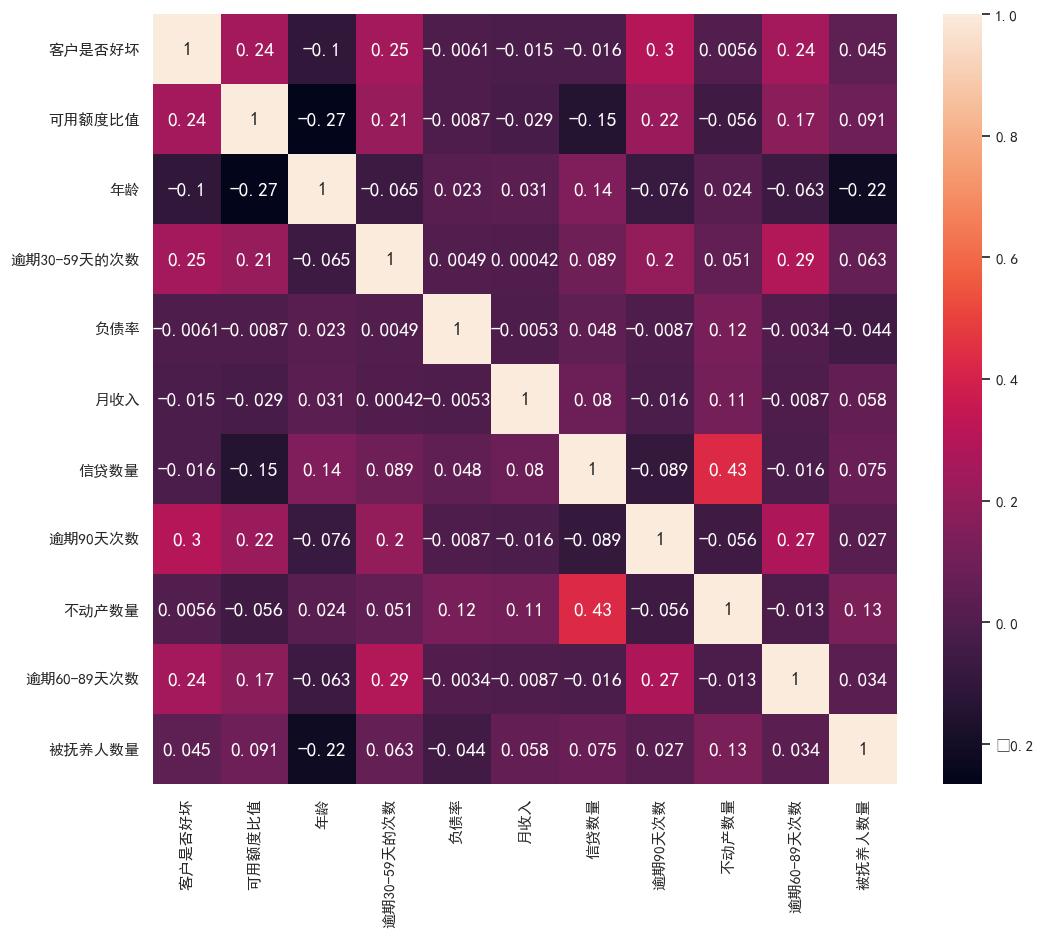

In [48]:
corr=train.corr()
sns.set(rc={'figure.figsize':(12,10),'font.size':14},font='SimHei')
sns.heatmap(corr,annot=True)

#### 可以看出这几个变量之间都没有很相关性非常高的变量，因此无需删除

# 3.特征选择

In [49]:
from scipy import stats

In [50]:
def auto_bin(x,y,n=5):
    r=0
    bad_num=y.sum()
    good_num=y.count()-bad_num
    max_r=0
    max_n=n
    while(n>1):
        d1=pd.DataFrame({'X':x,'Y':y,'Bucket':pd.qcut(x,n,duplicates='drop')})
        d2=d1.groupby('Bucket',as_index=True)
        r,p=stats.spearmanr(d2.mean().X,d2.mean().Y)
        if abs(max_r)<abs(r):
            max_r=r
        if max_r==r:
            max_n=n
        n=n-1
    n=max_n
    d1=pd.DataFrame({'X':x,'Y':y,'Bucket':pd.qcut(x,n,duplicates='drop')})
    d2=d1.groupby('Bucket',as_index=True)
    d3=pd.DataFrame()
    d3['min']=d2.min().X
    d3['max']=d2.max().X
    d3['badcustomer']=d2.sum().Y
    d3['goodcustomer']=d2.count().Y-d2.sum().Y
    d3['total']=d2.count().Y
    d3['bad_rate']=d3['badcustomer']/bad_num
    d3['good_rate']=d3['goodcustomer']/good_num
    d3['woe']=np.log(d3['bad_rate']/d3['good_rate'])
    d3['iv']=(d3['bad_rate']-d3['good_rate'])*d3['woe']
    woe=list(d3['woe'].round(6))
    cut=list(d3['max'].round(6))
    iv=d3['iv'].sum()
#     在最前面添加负无穷
    cut.insert(0,float('-inf'))
#     最后面添加正无穷
    cut[-1]=(float('inf'))
    return woe,cut,iv,d3

In [51]:
woe1,cut1,iv1,d31=auto_bin(train['月收入'],train['客户是否好坏'],10)
woe2,cut2,iv2,d32=auto_bin(train['年龄'],train['客户是否好坏'],10)
woe3,cut3,iv3,d33=auto_bin(train['负债率'],train['客户是否好坏'],10)
woe4,cut4,iv4,d34=auto_bin(train['可用额度比值'],train['客户是否好坏'],10)
woe5,cut5,iv5,d35=auto_bin(train['逾期30-59天的次数'],train['客户是否好坏'],10)
woe6,cut6,iv6,d36=auto_bin(train['信贷数量'],train['客户是否好坏'],10)
woe7,cut7,iv7,d37=auto_bin(train['逾期90天次数'],train['客户是否好坏'],25)
woe8,cut8,iv8,d38=auto_bin(train['不动产数量'],train['客户是否好坏'],25)
woe9,cut9,iv9,d39=auto_bin(train['逾期60-89天次数'],train['客户是否好坏'],100)
woe10,cut10,iv10,d310=auto_bin(train['被抚养人数量'],train['客户是否好坏'],10)
# print(woe7,cut7,iv7,d37)
# print(woe8,cut8,iv8,d38)
# print(woe9,cut9,iv9,d39)
# print(woe10,cut10,iv10,d310)

In [52]:
IV=pd.DataFrame([iv1,iv2,iv3,iv4,iv5,iv6,iv7,iv8,iv9,iv10],index=['月收入','年龄','负债率','可用额度比值','逾期30-59天的次数'
                                                                 ,'信贷数量','逾期90天次数','不动产数量','逾期60-89天次数','被抚养人数量'])
IV

,0
月收入,0.052285
年龄,0.200126
负债率,0.016314
可用额度比值,0.802714
逾期30-59天的次数,0.387060
信贷数量,0.000343
逾期90天次数,0.402751
不动产数量,0.000003
逾期60-89天次数,0.191051
被抚养人数量,0.025508


In [53]:
print(woe1,cut1,iv1,d31)

[0.277111, -0.087133, -0.281265] [-inf, 4741.0, 6708.410485, inf] 0.052284586478295134                          min           max  badcustomer  goodcustomer  total  \
Bucket                                                                         
(-0.001, 4741.0]         0.0  4.741000e+03         3729         45075  48804   
(4741.0, 6708.41]     4742.0  6.708410e+03         2960         51502  54462   
(6708.41, 3008750.0]  6709.0  3.008750e+06         1949         41177  43126   

                      bad_rate  good_rate       woe        iv  
Bucket                                                         
(-0.001, 4741.0]      0.431697   0.327214  0.277111  0.028953  
(4741.0, 6708.41]     0.342672   0.373869 -0.087133  0.002718  
(6708.41, 3008750.0]  0.225631   0.298917 -0.281265  0.020613  


In [54]:
def replace_woe(x,cut,woe):
    x_woe=pd.cut(x,cut,labels=woe)
    return x_woe

In [55]:
train1_woe=replace_woe(train['月收入'],cut1,woe1)
train2_woe=replace_woe(train['年龄'],cut2,woe2)
train3_woe=replace_woe(train['负债率'],cut3,woe3)
train4_woe=replace_woe(train['可用额度比值'],cut4,woe4)
train5_woe=replace_woe(train['逾期30-59天的次数'],cut5,woe5)
train6_woe=replace_woe(train['信贷数量'],cut6,woe6)
train7_woe=replace_woe(train['逾期90天次数'],cut7,woe7)
train8_woe=replace_woe(train['不动产数量'],cut8,woe8)
train9_woe=replace_woe(train['逾期60-89天次数'],cut9,woe9)
train10_woe=replace_woe(train['被抚养人数量'],cut10,woe10)

In [56]:
trainwoe=pd.DataFrame({'月收入':train1_woe,'年龄':train2_woe,'负债率':train3_woe,'可用额度比值':train4_woe,'逾期30-59天的次数':train5_woe
             ,'信贷数量':train6_woe,'逾期90天次数':train7_woe,'不动产数量':train8_woe,'逾期60-89天次数':train9_woe,'被抚养人数量':train10_woe})

In [57]:
trainwoe.to_csv(r'G:\Give me some creadit\Dataset\trainwoe.csv',encoding='utf-8-sig')

In [58]:
test1_woe=replace_woe(test['月收入'],cut1,woe1)
test2_woe=replace_woe(test['年龄'],cut2,woe2)
test3_woe=replace_woe(test['负债率'],cut3,woe3)
test4_woe=replace_woe(test['可用额度比值'],cut4,woe4)
test5_woe=replace_woe(test['逾期30-59天的次数'],cut5,woe5)
test6_woe=replace_woe(test['信贷数量'],cut6,woe6)
test7_woe=replace_woe(test['逾期90天次数'],cut7,woe7)
test8_woe=replace_woe(test['不动产数量'],cut8,woe8)
test9_woe=replace_woe(test['逾期60-89天次数'],cut9,woe9)
test10_woe=replace_woe(test['被抚养人数量'],cut10,woe10)

In [59]:
testwoe=pd.DataFrame({'月收入':test1_woe,'年龄':test2_woe,'负债率':test3_woe,'可用额度比值':test4_woe,'逾期30-59天的次数':test5_woe
             ,'信贷数量':test6_woe,'逾期90天次数':test7_woe,'不动产数量':test8_woe,'逾期60-89天次数':test9_woe,'被抚养人数量':test10_woe})

In [60]:
testwoe.isnull().sum()

月收入            0
年龄             0
负债率            0
可用额度比值         0
逾期30-59天的次数    0
信贷数量           0
逾期90天次数        0
不动产数量          0
逾期60-89天次数     0
被抚养人数量         0
dtype: int64

In [61]:
testwoe.isnull().sum()

月收入            0
年龄             0
负债率            0
可用额度比值         0
逾期30-59天的次数    0
信贷数量           0
逾期90天次数        0
不动产数量          0
逾期60-89天次数     0
被抚养人数量         0
dtype: int64

In [62]:
testwoe.to_csv(r'G:\Give me some creadit\Dataset\testwoe.csv',encoding='utf-8-sig')

In [63]:
trainwoe.isnull().sum()

月收入            0
年龄             0
负债率            0
可用额度比值         0
逾期30-59天的次数    0
信贷数量           0
逾期90天次数        0
不动产数量          0
逾期60-89天次数     0
被抚养人数量         0
dtype: int64

In [64]:
testwoe.shape

(99096, 10)

# 4.Baseline训练

In [65]:
# pip install sklearn

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature=trainwoe
y=train['客户是否好坏']
x_train,x_test,y_train,y_test=train_test_split(feature,y)

In [67]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(109794, 10) (36598, 10) (109794,) (36598,)


In [68]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [69]:
score_proba=LR.predict_proba(x_test)
score_proba

array([[0.99047692, 0.00952308],
       [0.97268367, 0.02731633],
       [0.92680423, 0.07319577],
       ...,
       [0.91794334, 0.08205666],
       [0.97833482, 0.02166518],
       [0.98820493, 0.01179507]])

In [70]:
y_pred=score_proba[:,1]
y_pred

array([0.00952308, 0.02731633, 0.07319577, ..., 0.08205666, 0.02166518,
       0.01179507])

In [82]:
coe=LR.coef_
coe.shape

(1, 10)

In [71]:
print("测试得分为：",LR.score(x_test,y_test))

测试得分为： 0.9403246079020712


# 5.模型评估

<Figure size 1000x800 with 0 Axes>

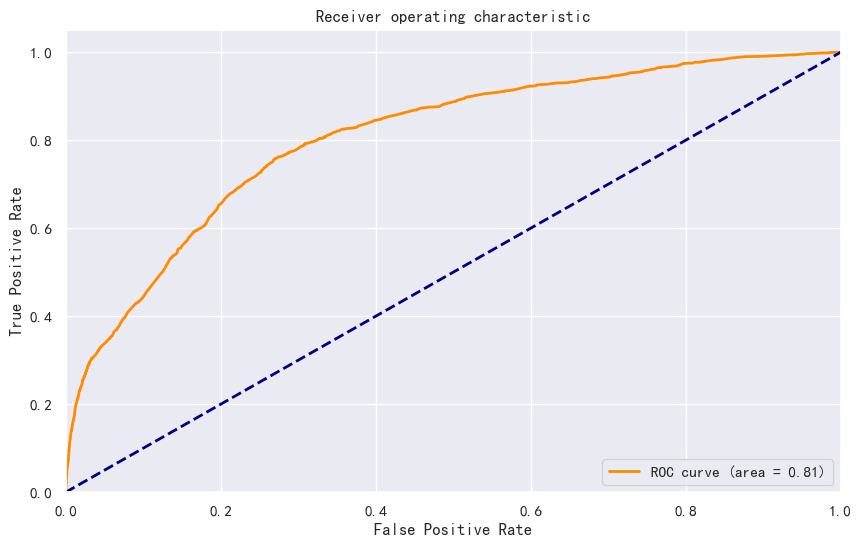

0.8059598351991895
0.48826185653455345


In [72]:
%matplotlib inline
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,y_pred)
auc_score=auc(fpr,tpr)
plt.figure(figsize=(10,8))
plt.figure(figsize=(10, 6)) # 创建一个大小为10x6的图像
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score) # 绘制ROC曲线，其中color表示颜色，lw表示线条宽度，label表示图例的标签，%0.2f用于格式化字符串以显示ROC曲线下面积
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 绘制对角线，表示随机分类器的ROC曲线
plt.xlim([0.0, 1.0]) # 设置X轴的取值范围
plt.ylim([0.0, 1.05]) # 设置Y轴的取值范围
plt.xlabel('False Positive Rate') # 设置X轴的标签
plt.ylabel('True Positive Rate') # 设置Y轴的标签
plt.title('Receiver operating characteristic') # 设置图像的标题
plt.legend(loc="lower right") # 添加图例，并设置其位置
plt.show() # 显示图像
print(auc_score)
print(max(tpr-fpr))

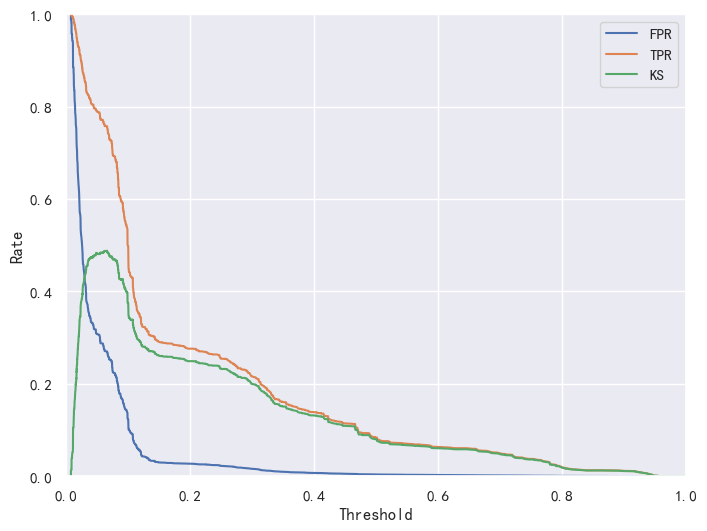

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(threshold, fpr, label='FPR')
ax.plot(threshold, tpr, label='TPR')
ax.plot(threshold, tpr-fpr, label='KS')
# ax.axvline(x=ks_cutoff, linestyle='--', color='grey', label='KS cutoff')
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

In [88]:
factor=20/np.log(2)
offset=600-factor*np.log(20)
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

In [103]:
feature0=get_score(coe[0][0],woe1,factor)
feature1=get_score(coe[0][1],woe1,factor)
feature2=get_score(coe[0][2],woe1,factor)
feature3=get_score(coe[0][3],woe1,factor)
feature4=get_score(coe[0][4],woe1,factor)
feature5=get_score(coe[0][5],woe1,factor)
feature6=get_score(coe[0][6],woe1,factor)
feature7=get_score(coe[0][7],woe1,factor)
feature8=get_score(coe[0][8],woe1,factor)
feature9=get_score(coe[0][9],woe1,factor)
print('月收入：',feature0)
print('年龄 ：',feature1)
print('负债率：',feature2)
print('可用额度比值：',feature3)
print('逾期30-59天的次数：',feature4)
print('信贷数量：',feature5)
print('不动产数量 ：',feature6)
print('逾期90天次数 ：',feature7)
print('逾期60-89天次数 ：',feature8)
print('被抚养人数量 ：',feature9)

月收入： [5.0, -2.0, -5.0]
年龄 ： [4.0, -1.0, -4.0]
负债率： [5.0, -2.0, -5.0]
可用额度比值： [6.0, -2.0, -6.0]
逾期30-59天的次数： [5.0, -2.0, -6.0]
信贷数量： [-23.0, 7.0, 24.0]
不动产数量 ： [5.0, -2.0, -6.0]
逾期90天次数 ： [-3.0, 1.0, 3.0]
逾期60-89天次数 ： [4.0, -1.0, -4.0]
被抚养人数量 ： [2.0, -1.0, -2.0]


In [106]:
woe_list=pd.read_csv(r'G:\Give me some creadit\Dataset\testwoe.csv')

In [122]:
def get_total(coe,woe_list,factor,offset):
    n=coe.shape[1]#特征数量
    series=0
    for i in range(n):
        series += coe[0][i]*woe_list.iloc[:,i+1]
    score=series*factor+offset
    return score

In [123]:
woe_list['score']=get_total(coe,woe_list,factor,offset)
woe_list.to_csv(r'G:\Give me some creadit\Dataset\trainwoe_score.csv',encoding='utf-8-sig')